In [2]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_train) = mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

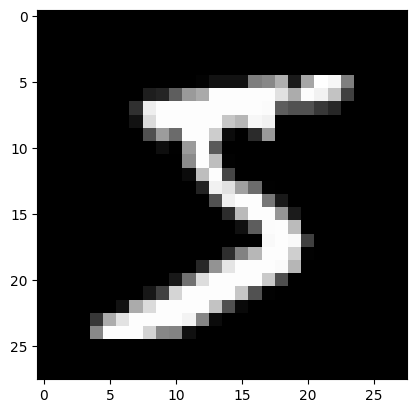

In [7]:
# Plot image data from x_train
plt.imshow(X_train[0], cmap = "gray")


plt.show()

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [9]:

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [24]:
#input_size = ...
input_size = 784
hidden_size = 128
latent_size = 32

In [11]:
from keras.models import Model
from keras.layers import Dense, Input

In [26]:
input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
latent_rep = Dense(latent_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(latent_rep)
output_img = Dense(input_size, activation='sigmoid')(hidden_2)

In [27]:
autoencoder = Model(input_img, output_img)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1897
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1006
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0928
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0894
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0876


In [28]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(X_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(X_test[i].reshape(*dims))
        plt.gray()
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(*dims))
        plt.gray()
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


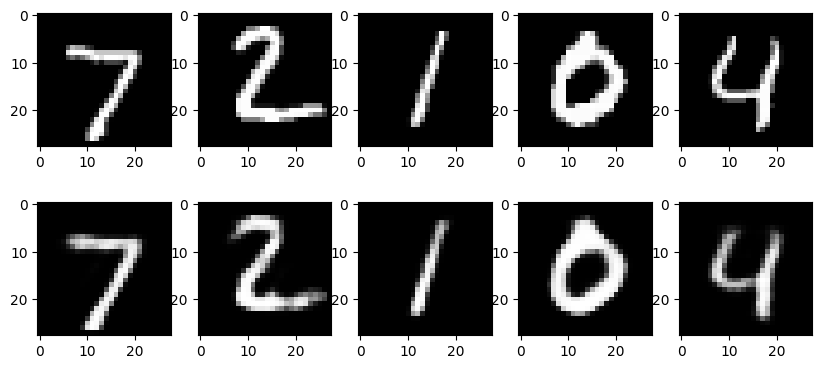

In [29]:
plot_autoencoder_outputs(autoencoder, 5, (28, 28))